In [12]:
import json
import csv
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.dates as mdates
from datetime import timedelta 

In [68]:
names = ["endsong_"+str(i)+".json" for i in range(0,10)]


dfs = [] # an empty list to store the data frames
for file in names:
    path = "/Users/jasonmaytin/Desktop/Music/Spotify Data/"
    data = pd.read_json(path + file) # read data frame from json file
    dfs.append(data) # append the data frame to the list

temp = pd.concat(dfs, ignore_index=True)#.sort_values("ts").reset_index(drop=True)

In [69]:
top = temp.groupby("master_metadata_track_name").count().sort_values("ts",ascending=False)

In [70]:
mini = pd.to_datetime(temp["ts"]).dt.date.min()
maxi = pd.to_datetime(temp["ts"]).dt.date.max()
len(pd.date_range(mini,maxi))

3249

In [ ]:
#temp.groupby("ts").count()

In [ ]:
#     song = temp["master_metadata_track_name"]=="BOYSHIT"
#     dates = pd.to_datetime(temp["ts"]).dt#.date()
#     vals = np.cumsum(song)
#     plt.plot(dates,vals,label="BOYSHIT")

/Users/jasonmaytin/opt/anaconda3/lib/python3.8/site-packages/IPython/core/pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


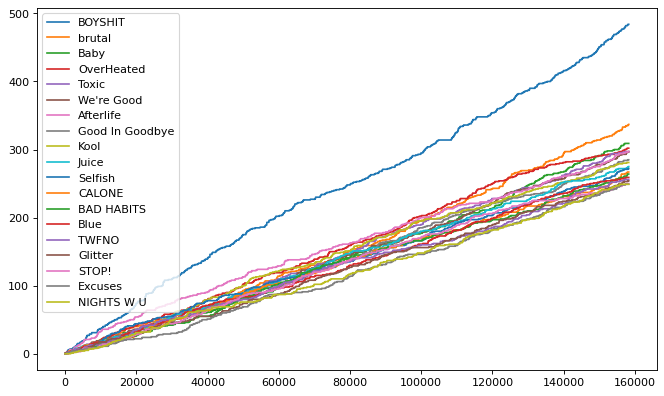

In [71]:
from matplotlib.pyplot import figure

figure(figsize=(10, 6), dpi=80)

def song(name):
    song = temp["master_metadata_track_name"]==name
    dates = pd.to_datetime(temp["ts"]).dt.normalize()
    vals = np.cumsum(song)
    plt.plot(vals,label=name)
    
for i in top.index[1:20]:
    song(i)
plt.legend()

In [72]:
names = ["StreamingHistory"+str(i)+".json" for i in range(0,8)]


dfs = [] # an empty list to store the data frames
for file in names:
    path = "/Users/jasonmaytin/Desktop/MyData/"
    data = pd.read_json(path + file) # read data frame from json file
    dfs.append(data) # append the data frame to the list

temp2 = pd.concat(dfs, ignore_index=True)#.sort_values("ts").reset_index(drop=True)

In [73]:
want2 = temp2[temp2["msPlayed"]>60000]
want2["endTime"] = pd.to_datetime(want2["endTime"])
want2["year"] = want2["endTime"].dt.year.astype("str")
want2["month"] = want2["endTime"].dt.month.astype("str")
want2["day"] = want2["endTime"].dt.day.astype("str")
want2["date"] = want2[['year', "month","day"]].agg('-'.join, axis=1)


want1 = temp[temp["ms_played"]>60000]
want1 = want1[["ts","master_metadata_track_name","master_metadata_album_artist_name","master_metadata_album_album_name"]]
want1["endTime"] = pd.to_datetime(want1["ts"])
want1["year"] = want1["endTime"].dt.year.astype("str")
want1["month"] = want1["endTime"].dt.month.astype("str")
want1["day"] = want1["endTime"].dt.day.astype("str")
want1["date"] = want1[['year', "month","day"]].agg('-'.join, axis=1)

want1 = want1.drop(columns="ts")
want1.columns = ["trackName","artistName","albumName","endTime","year","month","day","date"]
want1 = want1[['date', 'year', 'month','day','trackName', 'artistName', 'albumName']]
want2 = want2[['date', 'year', 'month','day','trackName', 'artistName']]

<ipython-input-73-c64b3d95a963>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  want2["endTime"] = pd.to_datetime(want2["endTime"])
<ipython-input-73-c64b3d95a963>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  want2["year"] = want2["endTime"].dt.year.astype("str")
<ipython-input-73-c64b3d95a963>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata

In [74]:
sort1 = want1.sort_values("date").reset_index(drop=True)
sort2 = want2.sort_values("date").reset_index(drop=True)

booled1 = sort1[sort1["date"]<"2022-03-03"]

final = pd.concat([sort1,sort2]).reset_index(drop=True)
final["date"] = pd.to_datetime(final["date"])

In [75]:
newerfinal = final[final["date"]>"2018-12-31"]
topArt = newerfinal.groupby("artistName").count().sort_values("date",ascending=False)
topSong = newerfinal.groupby(["trackName","artistName"]).count().sort_values("date",ascending=False)

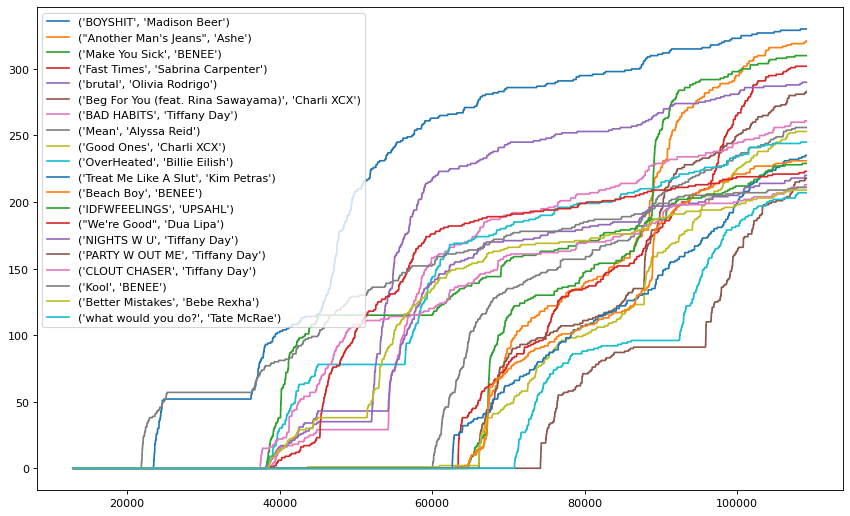

In [76]:
from matplotlib.pyplot import figure

figure(figsize=(13, 8), dpi=80)

def song(name):
    song = (newerfinal["trackName"]==name[0]) & (newerfinal["artistName"]==name[1])
    vals = np.cumsum(song)
    plt.plot(vals,label=name)
    
    #x = final["date"]
    #plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y/%m/%d'))
    #plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=365))
    
for i in topSong.index[0:20]:
    song(i)
plt.legend()

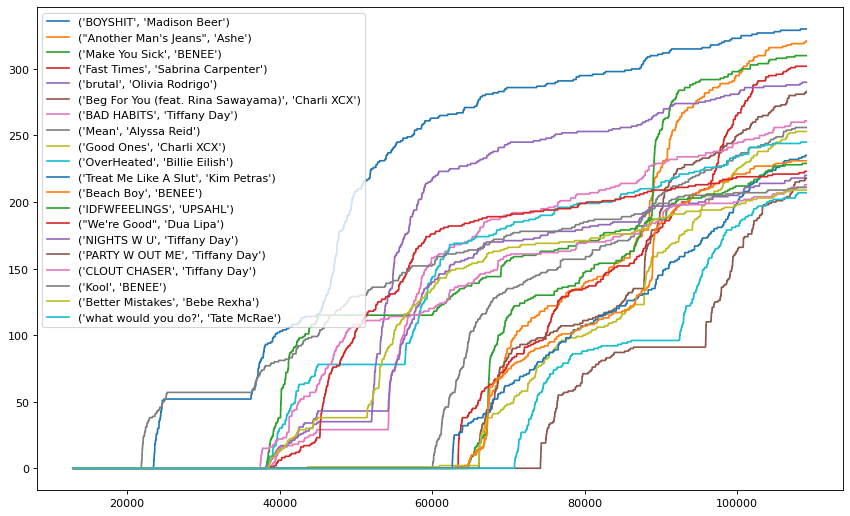

In [77]:
from matplotlib.pyplot import figure

figure(figsize=(13, 8), dpi=80)

def song(name):
    song = (newerfinal["trackName"]==name[0]) & (newerfinal["artistName"]==name[1])
    vals = np.cumsum(song)
    plt.plot(vals,label=name)
    
    #x = final["date"]
    #plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y/%m/%d'))
    #plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=365))
    
for i in topSong.index[0:20]:
    song(i)
plt.legend()

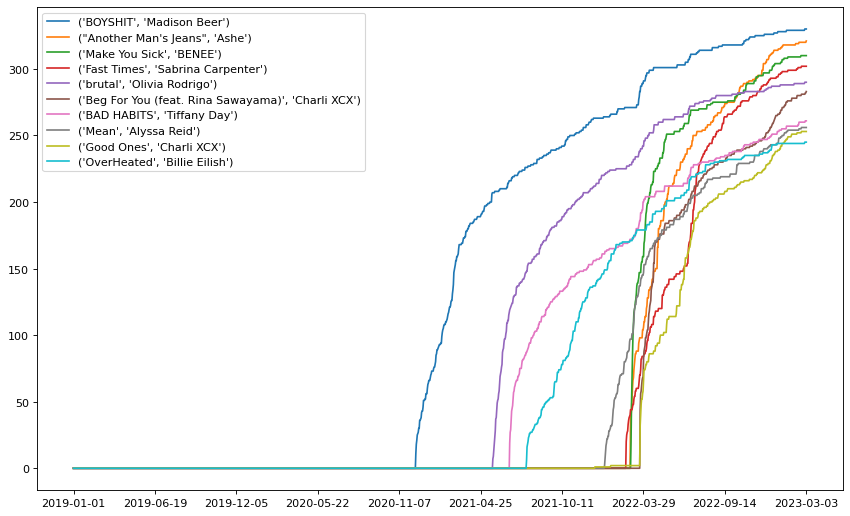

In [78]:
figure(figsize=(13, 8), dpi=80)

def song(name):
    idx = pd.date_range('01-01-2019', '03-03-2023')
    s = newerfinal[(newerfinal["trackName"]==name[0]) & (newerfinal["artistName"]==name[1])].groupby("date").count()
    s = s.reindex(idx, fill_value=0)
    plt.plot(s["year"].cumsum(),label=name)
    plt.xticks(pd.date_range(start="01-01-2019",end="03-03-2023",periods=10))

    
for i in topSong.index[0:10]:
    song(i)
plt.legend()

In [ ]:
figure(figsize=(13, 8), dpi=80)

idx = pd.date_range('11-22-2013', '03-03-2023')
s = final.groupby("date").count()["year"]
s = s.reindex(idx, fill_value=0)
#plt.plot(s.cumsum(),label=name)
plt.plot(s)
plt.xticks(pd.date_range(start="11-22-2013",end="03-03-2023",periods=10))
plt.show()

In [ ]:
np.mean(s[s.index>"2020-01-01"])

In [ ]:
figure(figsize=(13, 8), dpi=80)

idx = pd.date_range('01-01-2019', '03-03-2023')
s = newerfinal.groupby("date").count()["year"]
s = s.reindex(idx, fill_value=0)
#plt.plot(s.cumsum(),label=name)
plt.plot(s)
plt.xticks(pd.date_range(start="01-01-2019",end="03-03-2023",periods=10))
plt.show()

In [ ]:
figure(figsize=(13, 8), dpi=80)

def song(name):
    idx = pd.date_range('01-01-2019', '03-03-2023')
    s = newerfinal[(newerfinal["artistName"]==name)].groupby("date").count()
    s = s.reindex(idx, fill_value=0)
    plt.plot(s["year"].cumsum(),label=name)
    plt.xticks(pd.date_range(start="01-01-2019",end="03-03-2023",periods=10))

    
for i in topArt.index[0:3]:
    song(i)
plt.legend()

In [ ]:
topArt.index[0:20]

In [ ]:
figure(figsize=(13, 8), dpi=80)

def song(name):
    idx = pd.date_range('01-01-2019', '03-03-2023')
    s = newerfinal[(newerfinal["artistName"]==name)].groupby("date").count()
    s = s.reindex(idx, fill_value=0)
    plt.plot(s["year"].cumsum(),label=name)
    plt.ylim([0, s["year"].cumsum()[-1]+100])
    plt.xticks(pd.date_range(start="01-01-2019",end="03-03-2023",periods=10))
    
    firstplay = newerfinal[newerfinal["artistName"] == name].sort_values(by="date")
    indexes = firstplay["trackName"].drop_duplicates().index
    names = firstplay.loc[indexes]
    tracks = names["trackName"]
    trackdates = names["date"]
    for i in range(len(tracks)):
        plt.vlines(trackdates.iloc[i],ymin=0,ymax=3500,linestyles="dotted")
        plt.text(trackdates.iloc[i],s["year"].cumsum()[-1]/len(trackdates)*i,tracks.iloc[i])

    
song("Alyssa Reid")
plt.legend()

In [ ]:
tiff = newerfinal[newerfinal["artistName"]=="UPSAHL"]
counts = tiff.groupby("trackName").count()["date"]
counts = counts[counts > 20]
sizes = counts/sum(counts)
labels = sizes.index


fig, ax = plt.subplots()
ax.pie(sizes, labels=labels)
plt.show()

In [ ]:
# for i in topArt.index[0:30]:
#     tiff = newerfinal[newerfinal["artistName"]==i]
#     counts = tiff.groupby("trackName").count()["date"]
#     counts = counts[counts > 300]
#     sizes = counts/sum(counts)
#     labels = sizes.index

#     print(i)
#     fig, ax = plt.subplots()
#     ax.pie(sizes, labels=labels)
#     plt.show()